In [87]:
import pandas as pd
import numpy as np

# Our data is cleaned by cleaning utility code
df = pd.read_csv('Clean_Data_Adults_1.csv')

In [97]:
# Separate labels and Features
df_labels = df['Depressed']
df_feats = df.drop(['Depressed'], axis=1, inplace=False)

X = df_feats.get_values()  # features
y = df_labels.get_values() # labels

In [100]:
'''
Get rid of the negative values of the race_id columns
W.L.O.G., subtract the minimum negative from the entire column 
'''

# Get indices of column that contains negative values
neg_col_inds = np.unique(np.where(X<0)[1])

# Subtract minimum negative for each column
for neg_i in neg_col_inds:
    neg_col = X[:, neg_i]
    min_neg = np.min(neg_col)
    new_col = [c - min_neg for c in neg_col] 
    X[:, neg_i] = new_col

## 1. State assumptions about your data

- X are i.i.d. random variables.
- y ~ Bern(p)

## 2. Formally define classification problem

X: R<sup>n x m</sup>

X<sub>i</sub> ∈ R<sup>m</sup>, i ∈ [1, n]

y<sub>i</sub> ∈ {0, 1}, i ∈ [1, n]

g(X) → y

G := { g: R → {0, 1} }

g<sub>*</sub> = argmin<sub>g ∈ G</sub> E[ l(g(X), y) ]

loss function l differs for different classifiers and is speficied in the classfication context below.

## 3. Provide algorithm for solving problem (including choosing hyperparameters as appropriate)

- Multinomial Naive Bayes
    - fit_prior = True (learn class prior probabilities)
    - alpha = 1.0 (Laplace smoothing parameter)

In [134]:
'''
Data Preparation
'''
from sklearn.cross_validation import train_test_split

# Split the data into training set and test set
# Randomly sample 20% data for test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print 'Training set size is', train_X.shape
print 'Testing set size is', test_X.shape

max_n = len(train_X)

Training set size is (2236, 736)
Testing set size is (560, 736)


In [184]:
# Train the given classifier
def train_clf(clf, feats, labels):
    # Supervised training
    clf.fit(feats, labels)
    
# Test the given classifier  
def test_clf(clf, feats):
    # Predict using test set
    predicted = multiNB.predict(feats)
    return predicted

### Multinomial Naive Bayes

In [185]:
from sklearn.naive_bayes import MultinomialNB

NB_predictions = list()

for n in xrange(100, max_n, 100):
    multiNB = MultinomialNB()
    train_clf(multiNB, train_X[:n], train_y[:n])
    predict_y = test_clf(multiNB, test_X)
    NB_predictions.append(predict_y)

## 4. Sample data from a simulation setting inspired by your data (both null and alternate models)

## 5. Compute accuracy

In [186]:
def compute_acc(y_list):
    acc_list = list()
    for y in y_list:
        acc = np.mean(y == test_y)
        acc_list.append(acc)
    return acc_list

## 6. Plot accuracy vs. sample size in simulation

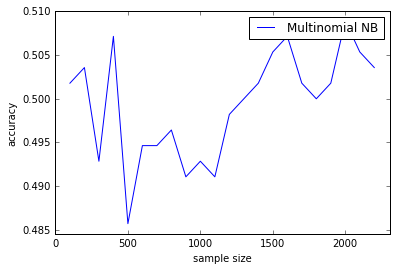

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt

sizes = [n for n in xrange(100, max_n, 100)]

acc_NB = compute_acc(NB_predictions)
plt.plot(sizes, acc_NB, label='Multinomial NB')

plt.legend()
plt.xlabel('sample size')
plt.ylabel('accuracy')

## 7. Apply method directly on real data 

In [133]:
'''
Multinomial Naive Bayes
'''
multiNB = MultinomialNB()
train_clf(multiNB, train_X, train_y)
predict_y, acc = test_clf(multiNB, test_X, test_y)

print acc 

0.505357142857


## 8. Explain the degree to which you believe the result and why